## SECP3223-02 Project - WHO TB Infection Estimates in Household Contacts

## Group DataPioneers

### Muhammad Nur Azhar Bin Mohd Yazid (A22EC0220) - Project Lead
### Che Marhumi Bin Che Ab Rahim (A22EC0147)
### Muhammad Safwan Bin Mohd Azmi (A22EC0221)

# Data Dictionary for LTBI Estimates Dataset

| **Column Name**                 | **Description**                                                                                     | **Data Type** |
|----------------------------------|-----------------------------------------------------------------------------------------------------|---------------|
| `country`                       | Name of the country                                                                                 | Category      |
| `iso2`                          | 2-letter ISO country code (some missing values)                                                     | Category      |
| `iso3`                          | 3-letter ISO country code                                                                            | Category      |
| `iso_numeric`                   | Numeric ISO country code                                                                             | Integer       |
| `g_whoregion`                   | WHO regional affiliation                                                                             | Category      |
| `year`                          | Year of the estimate                                                                                 | Integer       |
| `source_hh`                     | Source of household size data                                                                        | Category      |
| `e_hh_size`                     | Estimated average household size                                                                     | Float         |
| `prevtx_data_available`         | Indicator of whether previous treatment data is available                                            | Float         |
| `newinc_con_prevtx`             | New TB cases in contacts with previous treatment (partially available)                              | Float         |
| `newinc_con04_prevtx`           | New TB cases in children under 5 years in contacts with previous treatment                           | Float         |
| `ptsurvey_newinc`               | TB prevalence survey data for new cases (highly missing data)                                        | Float         |
| `ptsurvey_newinc_con04_prevtx`  | TB prevalence survey data for children under 5 years (highly missing data)                          | Float         |
| `e_hh_contacts`                 | Estimated total household contacts                                                                   | Float         |
| `e_hh_contacts_lo`              | Lower bound of estimated household contacts                                                         | Float         |
| `e_hh_contacts_hi`              | Upper bound of estimated household contacts                                                         | Float         |
| `e_prevtx_hh_contacts_pct`      | Percentage of household contacts with previous TB treatment                                          | Float         |
| `e_prevtx_hh_contacts_pct_lo`   | Lower bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_hh_contacts_pct_hi`   | Upper bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_eligible`             | Estimated number of individuals eligible for treatment                                               | Float         |
| `e_prevtx_eligible_lo`          | Lower bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_eligible_hi`          | Upper bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_kids_pct`             | Percentage of eligible individuals who are children                                                  | Float         |
| `e_prevtx_kids_pct_lo`          | Lower bound of the percentage of eligible children                                                   | Float         |
| `e_prevtx_kids_pct_hi`          | Upper bound of the percentage of eligible children                                                   | Float         |
| `household_contact_rate`        | Calculated as the total estimated household contacts (`e_hh_contacts`) divided by the average household size (`e_hh_size`). Represents the average number of TB contacts per household member. | Float         |
| `eligible_pct`                  | Calculated as the percentage of household contacts eligible for treatment. Derived as (`e_prevtx_eligible` / `e_hh_contacts`) * 100. Represents the proportion of household contacts eligible for further TB treatment. | Float         |

## Research Questions Related to the Dataset

1. Which countries or regions have the highest household contact per people for TB, and what factors might contribute to these rates?

2. What percentage of household contacts with previous TB treatment (e.g., e_prevtx_hh_contacts_pct) are eligible for further treatment, and how does this vary by country or region?

5. Have household contact rates or treatment eligibility improved over time (e.g., from 2015 to 2023), and are there any noticeable trends?

## Part A: Data Cleaning & Data Preparation
### Step 1: Load the dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'LTBI_estimates.csv'
tb_data = pd.read_csv(file_path)

# Overview of missing values before cleaning
print("Missing values before cleaning:")
print(tb_data.isnull().sum())


Missing values before cleaning:
country                            0
iso2                               9
iso3                               0
iso_numeric                        0
g_whoregion                        0
year                               0
source_hh                          0
e_hh_size                          0
prevtx_data_available            146
newinc_con_prevtx                957
newinc_con04_prevtx              642
ptsurvey_newinc                 1696
ptsurvey_newinc_con04_prevtx    1696
e_hh_contacts                     18
e_hh_contacts_lo                  18
e_hh_contacts_hi                  18
e_prevtx_hh_contacts_pct         644
e_prevtx_hh_contacts_pct_lo      644
e_prevtx_hh_contacts_pct_hi      644
e_prevtx_eligible                 18
e_prevtx_eligible_lo              18
e_prevtx_eligible_hi              18
e_prevtx_kids_pct                603
e_prevtx_kids_pct_lo             603
e_prevtx_kids_pct_hi             603
dtype: int64


### Step 2: Drop Columns with Excessive Missing Values

In [4]:
# Add specific columns to drop
columns_to_drop = ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']
columns_to_drop.extend(columns_to_drop)

# Drop the columns
tb_data_cleaned = tb_data.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")


Columns dropped: ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh', 'newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']


### Step 3a: Handling Missing Values in Numeric Columns with Median

In [5]:
# Handle missing values in numeric columns
numeric_cols = tb_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


C:\Users\MNAZHAR\AppData\Local\Temp\ipykernel_41296\743980646.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


### Step 4: Handle Missing Values in Categorical Columns with Mode

In [6]:
# Handle missing values in categorical columns
categorical_cols = tb_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].mode()[0], inplace=True)


### Step 5: Replace Zeros in Critical Columns

In [7]:
# Replace zeroes with median for critical numeric columns
critical_cols = ['e_hh_contacts', 'e_hh_size', 'e_prevtx_eligible']
for col in critical_cols:
    if col in tb_data_cleaned.columns:
        tb_data_cleaned[col] = tb_data_cleaned[col].replace(0, tb_data_cleaned[col].median())


### Step 6: Verify the Data Cleaning

In [7]:
# Overview of missing values after cleaning
print("Missing values after cleaning:")
print(tb_data_cleaned.isnull().sum())

tb_data_cleaned.info()
print()
tb_data_cleaned.describe()

Missing values after cleaning:
country                        0
g_whoregion                    0
year                           0
e_hh_size                      0
prevtx_data_available          0
e_hh_contacts                  0
e_hh_contacts_lo               0
e_hh_contacts_hi               0
e_prevtx_hh_contacts_pct       0
e_prevtx_hh_contacts_pct_lo    0
e_prevtx_hh_contacts_pct_hi    0
e_prevtx_eligible              0
e_prevtx_eligible_lo           0
e_prevtx_eligible_hi           0
e_prevtx_kids_pct              0
e_prevtx_kids_pct_lo           0
e_prevtx_kids_pct_hi           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1710 non-null   object 
 1   g_whoregion                  1710 non-null   object 
 2   year                         1710 non-null   int64 

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000


In [8]:
# Save cleaned dataset for further use
tb_data_cleaned.to_csv('LTBI_estimates_cleaned.csv', index=False)
print("Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.")

Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.


## Part B: Data Preparation

### Step 1: Load the Cleaned Dataset

In [9]:
# Load the cleaned dataset
file_path_cleaned = 'LTBI_estimates_cleaned.csv'
tb_data_prepared = pd.read_csv(file_path_cleaned)

# Verify the loaded data
print("Loaded cleaned dataset:")
print(tb_data_prepared.head())


Loaded cleaned dataset:
       country g_whoregion  year  e_hh_size  prevtx_data_available  \
0  Afghanistan         EMR  2015       8.04                   60.0   
1  Afghanistan         EMR  2016       8.04                   60.0   
2  Afghanistan         EMR  2017       8.04                   60.0   
3  Afghanistan         EMR  2018       8.04                   60.0   
4  Afghanistan         EMR  2019       8.04                   60.0   

   e_hh_contacts  e_hh_contacts_lo  e_hh_contacts_hi  \
0       120000.0          110000.0          120000.0   
1       130000.0          130000.0          130000.0   
2       140000.0          130000.0          140000.0   
3       140000.0          140000.0          150000.0   
4       170000.0          160000.0          170000.0   

   e_prevtx_hh_contacts_pct  e_prevtx_hh_contacts_pct_lo  \
0                       8.7                          8.5   
1                      12.0                         12.0   
2                      35.0           

### Step 2: Create Derived Features

- household_contact_rate: Total household contacts divided by household size.

- eligible_pct: Percentage of eligible household contacts for treatment.

In [10]:
# Create derived features
tb_data_prepared['household_contact_per_people'] = (tb_data_prepared['e_hh_contacts'] / tb_data_prepared['e_hh_size']).round(2)
tb_data_prepared['eligible_percent'] = ((tb_data_prepared['e_prevtx_eligible'] / tb_data_prepared['e_hh_contacts']) * 100).round(2)

print("Derived features created: 'household_contact_per_people', 'eligible_percent'.")


Derived features created: 'household_contact_per_people', 'eligible_percent'.


In [11]:
tb_data_prepared.info()
print()
tb_data_prepared.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1710 non-null   object 
 1   g_whoregion                   1710 non-null   object 
 2   year                          1710 non-null   int64  
 3   e_hh_size                     1710 non-null   float64
 4   prevtx_data_available         1710 non-null   float64
 5   e_hh_contacts                 1710 non-null   float64
 6   e_hh_contacts_lo              1710 non-null   float64
 7   e_hh_contacts_hi              1710 non-null   float64
 8   e_prevtx_hh_contacts_pct      1710 non-null   float64
 9   e_prevtx_hh_contacts_pct_lo   1710 non-null   float64
 10  e_prevtx_hh_contacts_pct_hi   1710 non-null   float64
 11  e_prevtx_eligible             1710 non-null   float64
 12  e_prevtx_eligible_lo          1710 non-null   float64
 13  e_p

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi,household_contact_per_people,eligible_percent
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977,12445.914497,9.142275
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728,54783.357426,6.929037
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.320000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000,145.722500,2.500000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000,1273.795000,8.050000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000,5187.840000,15.775000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000,799086.760000,23.330000


### Step 3: Save the prepared dataset

#### Save the prepared dataset for future use.


In [11]:
# Save the prepared dataset
tb_data_prepared.to_csv('LTBI_estimates_prepared.csv', index=False)
print("Prepared dataset saved as 'LTBI_estimates_prepared.csv'.")


Prepared dataset saved as 'LTBI_estimates_prepared.csv'.


## Part C: Feature Engineering and Data Aggregation

### Question 1: Which Top 10 Countries or Regions Have the Highest Household Contact Rates?

### Step 1: Load the Prepared Dataset

In [12]:
# Load dataset
file_path = 'LTBI_estimates_prepared.csv'
tb_data_prepared = pd.read_csv(file_path)

### Step 2: Group Data 

#### 1. Aggregate Data by Country

#### Group the data by country and calculate the mean household_contact_per_people. Sort the results in descending order and limit to the top 10 countries.

In [13]:
# Aggregate by country
contact_rate_by_country = (
    tb_data_prepared.groupby('country')['household_contact_per_people']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Display the top 10 countries
print("Top 10 Countries with Highest Household Contact Rates:")
print(contact_rate_by_country)


Top 10 Countries with Highest Household Contact Rates:
country
India                               667174.025556
China                               187705.454444
Indonesia                           170408.752222
Pakistan                            116176.471111
Bangladesh                          108242.044444
Philippines                         102442.866667
Nigeria                              92513.112222
Democratic Republic of the Congo     86825.703333
South Africa                         84656.083333
Viet Nam                             38436.693333
Name: household_contact_per_people, dtype: float64


#### 2. Aggregate Data by Region

#### Group the data by g_whoregion (region) and calculate the mean household_contact_per_people. Sort the results in descending order and limit to the top 10 regions.

In [14]:
# Aggregate by region
contact_rate_by_region = (
    tb_data_prepared.groupby('g_whoregion')['household_contact_per_people']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Display the top 10 regions
print("Top 10 Regions with Highest Household Contact Per People:")
print(contact_rate_by_region)


Top 10 Regions with Highest Household Contact Per People:
g_whoregion
SEA    95193.950909
WPR    15583.737361
AFR    12676.301655
EMR     7870.422576
AMR     2958.757841
EUR     1393.894096
Name: household_contact_per_people, dtype: float64


#### Step 3: Display the Results

#### Combine the results from step 2 into a report.

In [15]:
# Display the combined report
print("\nSummary of Household Contact Per People:")
print(f"Top Country: {contact_rate_by_country.idxmax()} with Rate: {contact_rate_by_country.max():,.2f}")
print(f"Top Region: {contact_rate_by_region.idxmax()} with Rate: {contact_rate_by_region.max():,.2f}")



Summary of Household Contact Per People:
Top Country: India with Rate: 667,174.03
Top Region: SEA with Rate: 95,193.95


### Question 2: What percentage of household contacts with previous TB treatment (e.g., e_prevtx_hh_contacts_pct) are eligible for further treatment, and how does this vary by country or region?

#### Step 1: Load the Dataset (no need as it has been loaded above)

#### Step 2: Aggregate Data by Country

#### 1. Group the data by country and calculate the mean eligible_percent and e_prevtx_hh_contacts_pct.

In [16]:
# Aggregate by country with grouping column eligible percent and percentage of household contacts with previous TB treatment
eligibility_by_country = (
    tb_data_prepared.groupby('country')[['eligible_percent', 'e_prevtx_hh_contacts_pct']]
    .mean()
    .sort_values(by='eligible_percent', ascending=False)
)

# Display the result
print("Eligibility by Country:")
print(eligibility_by_country.head(10))  # Display top 10 countries


Eligibility by Country:
                                  eligible_percent  e_prevtx_hh_contacts_pct
country                                                                     
Democratic Republic of the Congo         21.722222                  8.716667
Somalia                                  21.682222                  8.038889
Chad                                     21.555556                  5.444444
Niger                                    21.500000                 10.455556
Mozambique                               21.414444                 32.838889
Mali                                     21.171111                  4.598889
Burundi                                  21.088889                  7.755556
Angola                                   21.072222                  9.550000
Uganda                                   20.576667                 24.938889
United Republic of Tanzania              19.735556                  9.744444


#### 2. Aggregate Data by Region

#### Group the data by g_whoregion and calculate the mean eligible_percent and e_prevtx_hh_contacts_pct.

In [17]:
# Aggregate by region
eligibility_by_region = (
    tb_data_prepared.groupby('g_whoregion')[['eligible_percent', 'e_prevtx_hh_contacts_pct']]
    .mean()
    .sort_values(by='eligible_percent', ascending=False)
)

# Display the result
print("Eligibility by Region:")
print(eligibility_by_region)


Eligibility by Region:
             eligible_percent  e_prevtx_hh_contacts_pct
g_whoregion                                            
AFR                 17.349645                 12.183050
SEA                  9.826364                  8.524242
EMR                  8.678535                 17.359040
WPR                  8.313750                 12.853148
AMR                  6.281302                 17.411651
EUR                  3.984423                 19.117320


### Question 3: Have Household Contact Rates or Treatment Eligibility Improved Over Time?

#### Step 1: Load the Dataset (no need as it has been loaded above)

#### Step 2: Aggregate Data by Year

#### Group the data by year to calculate the mean household_contact_per_people and eligible_percent.

In [18]:
# Aggregate by year
trends_over_time = tb_data_prepared.groupby('year')[['household_contact_per_people', 'eligible_percent']].mean()

# Display the aggregated trends
print("Trends Over Time:")
print(trends_over_time)


Trends Over Time:
      household_contact_per_people  eligible_percent
year                                                
2015                  10963.622368          9.612105
2016                  11369.700474          9.575474
2017                  11735.889211          9.489263
2018                  11764.894421          9.267737
2019                  12601.124211          9.183421
2020                  10421.191947          8.982526
2021                  12651.537526          8.889632
2022                  14585.618947          8.714947
2023                  15919.651368          8.565368


## Part D: Data Visualization

#### Q1: Top 10 Countries or Regions Have the Highest Household Contact Rates

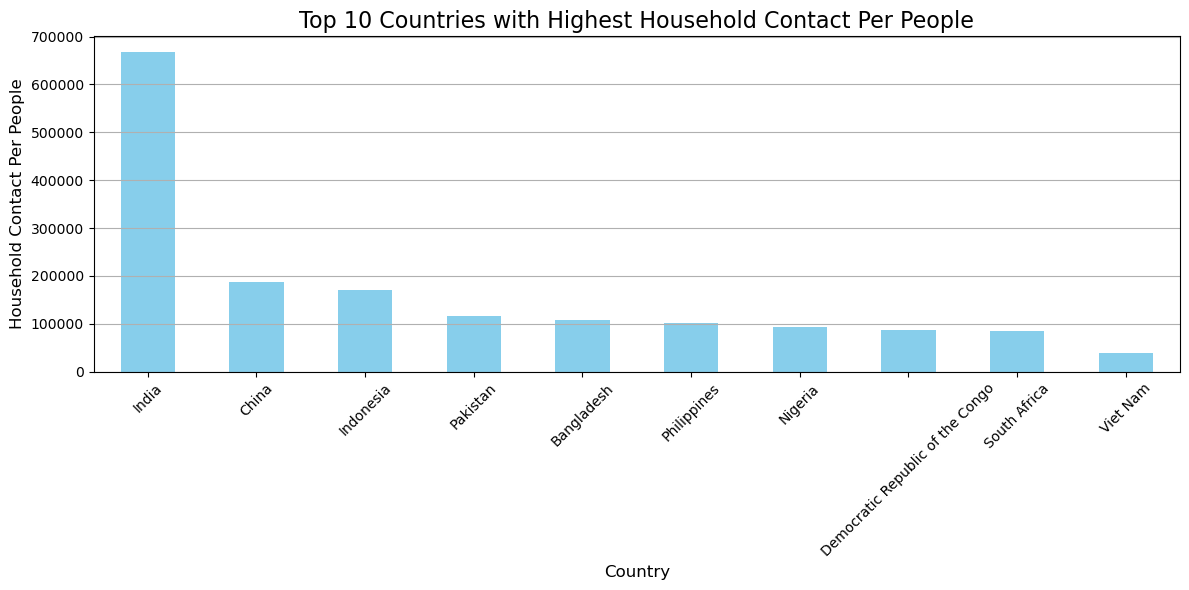

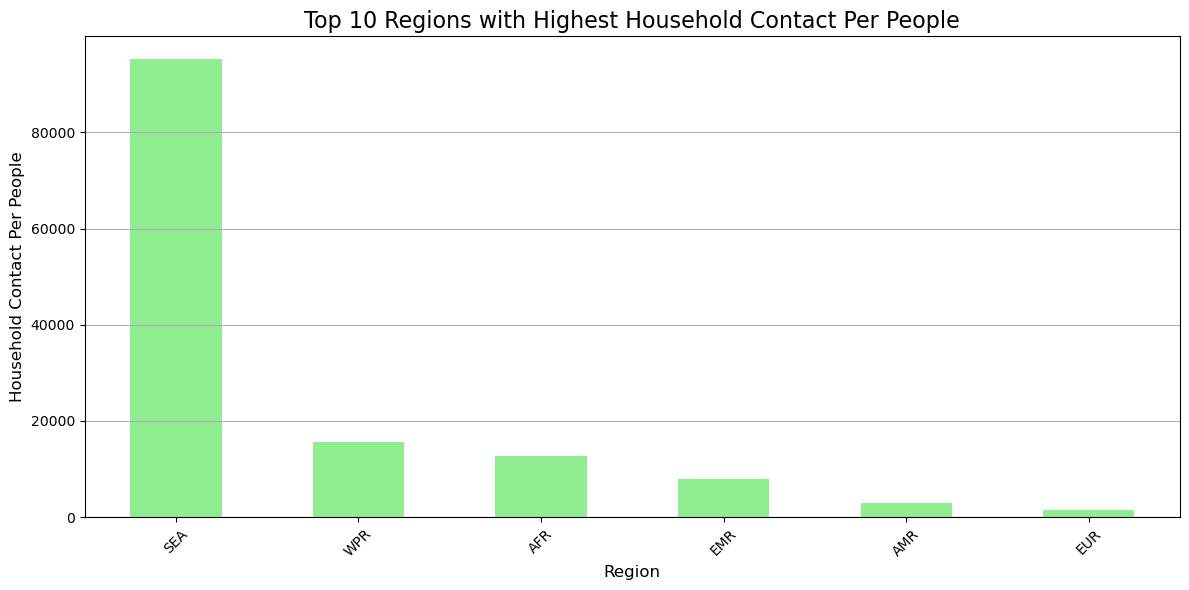

In [19]:
import matplotlib.pyplot as plt

# Plot Top 10 Countries
plt.figure(figsize=(12, 6))
contact_rate_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Household Contact Per People', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Household Contact Per People', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Top 10 Regions
plt.figure(figsize=(12, 6))
contact_rate_by_region.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Regions with Highest Household Contact Per People', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Household Contact Per People', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Q2: Percentage of household contacts with previous TB treatment eligible for further treatment by Country and Region

<Figure size 1200x600 with 0 Axes>

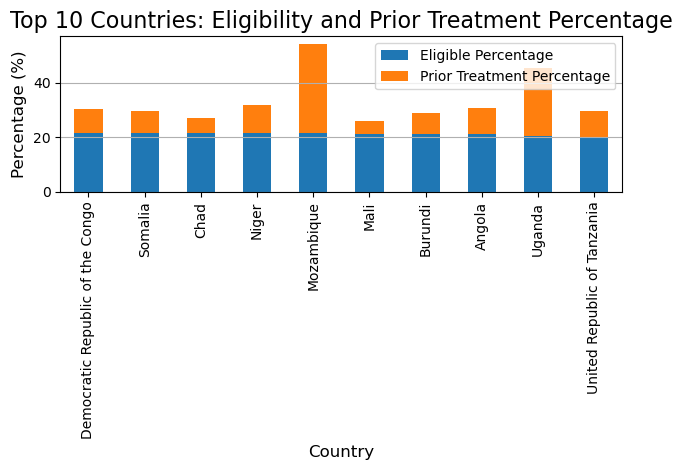

<Figure size 1200x600 with 0 Axes>

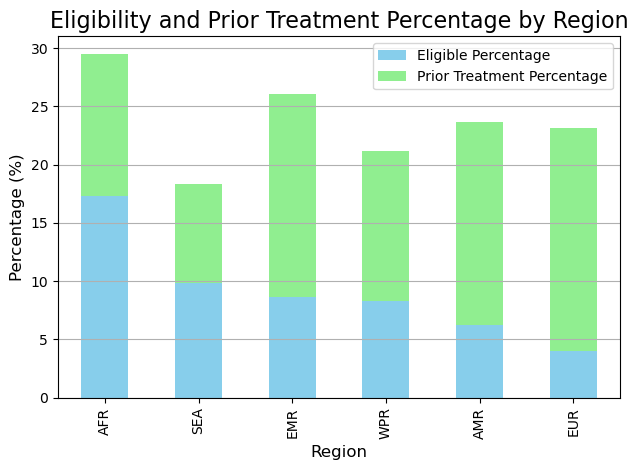

In [20]:
import matplotlib.pyplot as plt

# Plot Eligibility by Country
plt.figure(figsize=(12, 6))
eligibility_by_country.head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Countries: Eligibility and Prior Treatment Percentage', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Eligible Percentage', 'Prior Treatment Percentage'], fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Eligibility by Region
plt.figure(figsize=(12, 6))
eligibility_by_region.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Eligibility and Prior Treatment Percentage by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Eligible Percentage', 'Prior Treatment Percentage'], fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Q3: Trends Over Time for Household Contact per People and  Treatment Eligibility

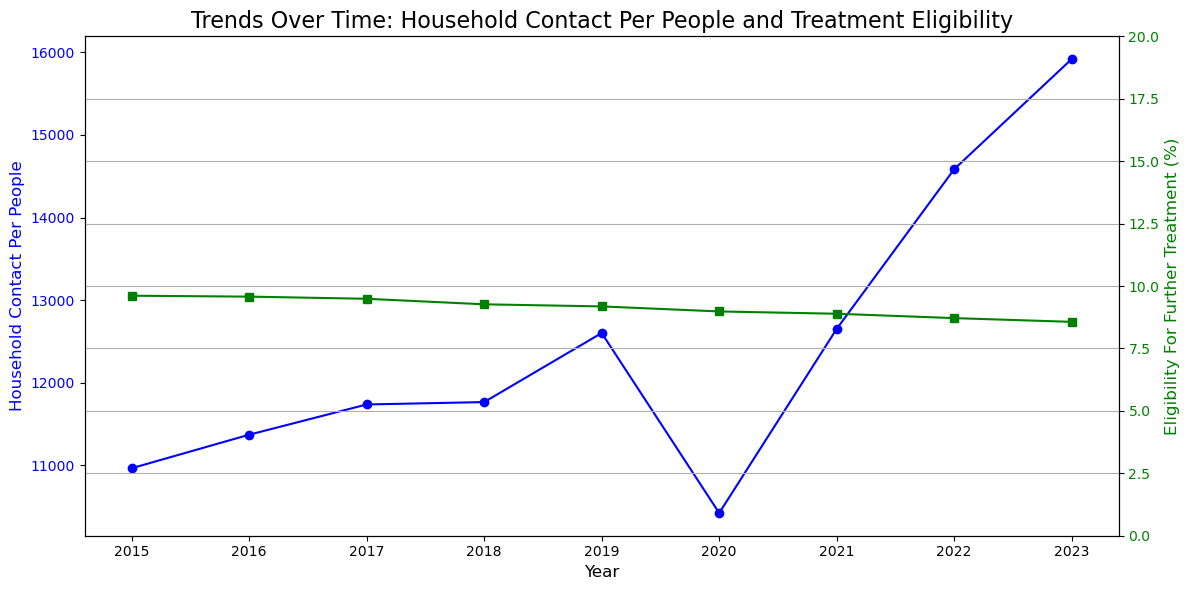

In [21]:
import matplotlib.pyplot as plt

# Plot trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Household Contact Rate on the primary y-axis
ax1.plot(trends_over_time.index, trends_over_time['household_contact_per_people'], marker='o', color='blue', label='Household Contact Per People')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Household Contact Per People', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(trends_over_time.index)

# Add a secondary y-axis for Treatment Eligibility Percentage
ax2 = ax1.twinx()
ax2.plot(trends_over_time.index, trends_over_time['eligible_percent'], marker='s', color='green', label='Treatment Eligibility (%)')
ax2.set_ylabel('Eligibility For Further Treatment (%)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 20)  # Adjust y-axis for eligibility percentage

# Add title and grid
plt.title('Trends Over Time: Household Contact Per People and Treatment Eligibility', fontsize=16)
fig.tight_layout()
plt.grid()

# Show the plot
plt.show()


## Part E: Machine Learning (Clustering)

#### We decided to implement clustering into this question:

#### "Which countries or regions have similar patterns of household contact rates and treatment eligibility?"

### Step 1: Prepare the Dataset

#### Select relevant features like household_contact_per_people and eligible_percent, handle missing values, and normalize the data.

## QUESTION 1 - RANDOM FOREST REGRESSOR 

RMSE: 41894.16211781201
                    Feature  Importance
0                 e_hh_size    0.491008
3          eligible_percent    0.305243
2  e_prevtx_hh_contacts_pct    0.186176
1     prevtx_data_available    0.017573


c:\Users\MNAZHAR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


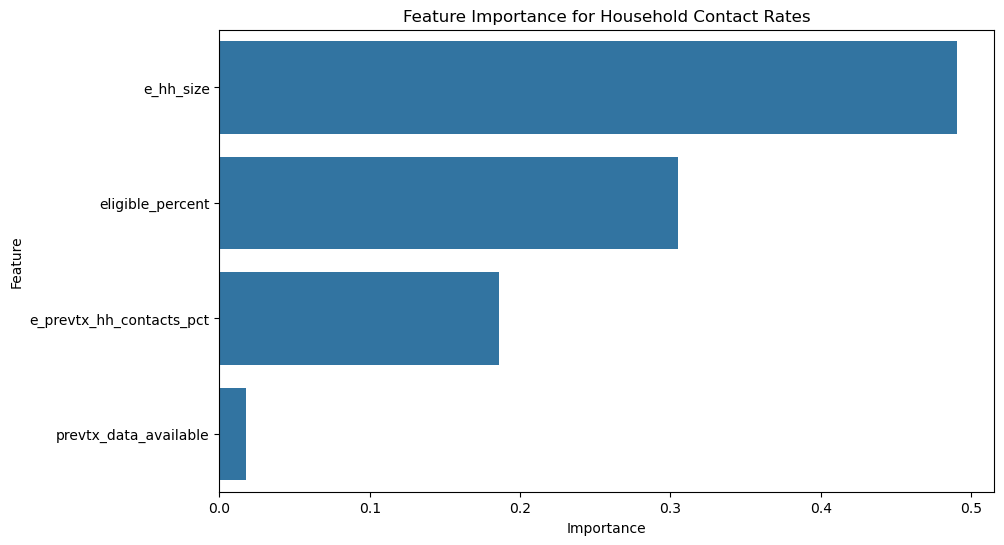

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('LTBI_estimates_prepared.csv')

# Select relevant features and target variable
features = ['e_hh_size', 'prevtx_data_available', 'e_prevtx_hh_contacts_pct', 'eligible_percent']
target = 'household_contact_per_people'

# Drop missing values
data_cleaned = data.dropna(subset=features + [target])

# Train-test split
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Feature importance
importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance for Household Contact Rates')
plt.show()

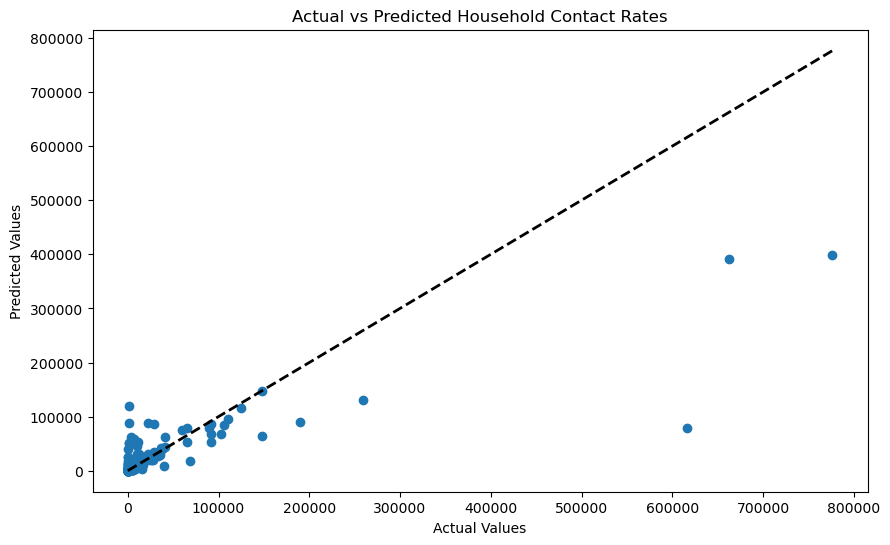

In [23]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Household Contact Rates')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## QUESTION 2 - RANDOM FOREST REGRESSOR 

RMSE: 1.5081035486877417
                              country  predicted_eligible_percent
48   Democratic Republic of the Congo                   21.559338
153                           Somalia                   21.474237
120                             Niger                   21.171911
113                        Mozambique                   20.998788
27                            Burundi                   20.924767
3                              Angola                   20.921564
104                              Mali                   20.874276
33                               Chad                   20.531861
175                            Uganda                   20.495216
179       United Republic of Tanzania                   20.029944


c:\Users\MNAZHAR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


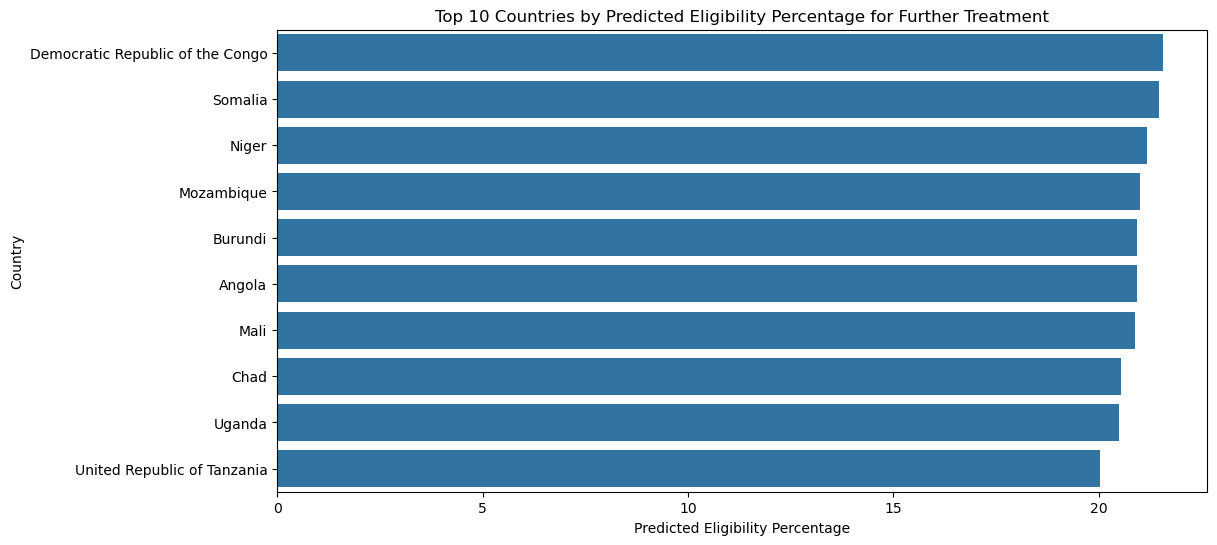

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('LTBI_estimates_prepared.csv')

# Select relevant features and target variable
features = ['e_prevtx_hh_contacts_pct', 'e_prevtx_eligible', 'e_hh_size']
target = 'eligible_percent'

# Drop missing values
data_cleaned = data.dropna(subset=features + [target])

# Train-test split
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Add predictions to the original dataset for country-level analysis
data_cleaned['predicted_eligible_percent'] = model.predict(X)

# Group by country to calculate average predicted eligibility percentages
eligibility_by_country = data_cleaned.groupby('country')['predicted_eligible_percent'].mean().reset_index()
eligibility_by_country = eligibility_by_country.sort_values(by='predicted_eligible_percent', ascending=False)

# Display top countries by predicted eligibility percentage
print(eligibility_by_country.head(10))

# Visualization of predicted eligibility percentages by country
plt.figure(figsize=(12, 6))
sns.barplot(x='predicted_eligible_percent', y='country', data=eligibility_by_country.head(10))
plt.title('Top 10 Countries by Predicted Eligibility Percentage for Further Treatment')
plt.xlabel('Predicted Eligibility Percentage')
plt.ylabel('Country')
plt.show()


## QUESTION 3: LINEAR REGRESSION

C:\Users\MNAZHAR\AppData\Local\Temp\ipykernel_41296\812514007.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


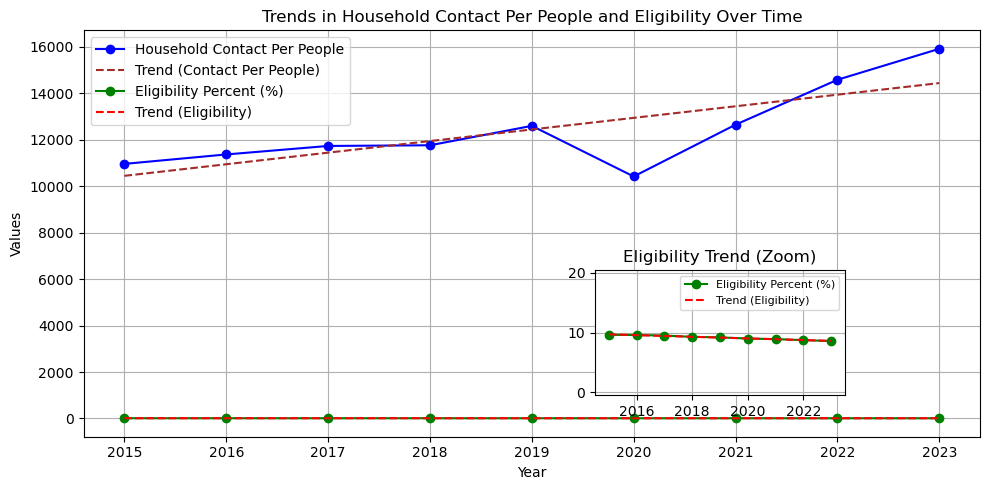

In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Aggregate data by year
time_data = data.groupby('year')[['household_contact_per_people', 'eligible_percent']].mean().reset_index()

# Linear regression for trends
X_time = time_data[['year']]
y_contact_rate = time_data['household_contact_per_people']
y_eligibility = time_data['eligible_percent']

model_contact_rate = LinearRegression()
model_contact_rate.fit(X_time, y_contact_rate)

model_eligibility = LinearRegression()
model_eligibility.fit(X_time, y_eligibility)

# Main Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Household Contact Per People and its trend
ax.plot(time_data['year'], y_contact_rate, label='Household Contact Per People', marker='o', color='blue')
ax.plot(time_data['year'], model_contact_rate.predict(X_time), linestyle='--', color='brown', label='Trend (Contact Per People)')

# Plot Eligibility Percent and its trend on the same axes
ax.plot(time_data['year'], y_eligibility, label='Eligibility Percent (%)', marker='o', color='green')
ax.plot(time_data['year'], model_eligibility.predict(X_time), linestyle='--', color='red', label='Trend (Eligibility)')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Trends in Household Contact Per People and Eligibility Over Time')
ax.grid()

# Inset plot for Eligibility Percent
inset_ax = fig.add_axes([0.6, 0.2, 0.25, 0.25])  # [X, Y, width, height]

# Add padding (indent) for x and y axes in zoomed inset
x_min, x_max = min(time_data['year']), max(time_data['year'])
y_min, y_max = 0, 20  # Adjusted to show the desired range for eligibility percent
x_padding, y_padding = 0.5, 0.5

inset_ax.plot(time_data['year'], y_eligibility, marker='o', color='green', label='Eligibility Percent (%)')
inset_ax.plot(time_data['year'], model_eligibility.predict(X_time), linestyle='--', color='red', label='Trend (Eligibility)')
inset_ax.set_title('Eligibility Trend (Zoom)')
inset_ax.set_xlim(x_min - x_padding, x_max + x_padding)
inset_ax.set_ylim(y_min - y_padding, y_max + y_padding)
inset_ax.grid()
inset_ax.legend(fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
# Prepare new data for prediction (for 2026)
new_year = pd.DataFrame({'year': [2026]})

# Predict values for 2024
predicted_contact_rate = model_contact_rate.predict(new_year)
predicted_eligibility = model_eligibility.predict(new_year)

# Display predictions
print(f"Predicted Household Contact Rate for 2026: {predicted_contact_rate[0]}")
print(f"Predicted Eligibility Percent for 2026: {predicted_eligibility[0]}")


Predicted Household Contact Rate for 2026: 15941.185481286608
Predicted Eligibility Percent for 2026: 8.179424853801152
